In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

%matplotlib inline

## Read data

In [2]:
#data = np.array([[1, 2], [2, 2], [2, 3],[8, 7], [8, 8], [25, 80]])
data = np.genfromtxt("./data/sample_dataset.csv", delimiter=',')
data

array([[ 1.84207953,  4.6075716 ],
       [ 5.65858312,  4.79996405],
       [ 6.35257892,  3.2908545 ],
       [ 2.90401653,  4.61220411],
       [ 3.23197916,  4.93989405],
       [ 1.24792268,  4.93267846],
       [ 1.97619886,  4.43489674],
       [ 2.23454135,  5.05547168],
       [ 2.98340757,  4.84046406],
       [ 2.97970391,  4.80671081],
       [ 2.11496411,  5.37373587],
       [ 2.12169543,  5.20854212],
       [ 1.5143529 ,  4.77003303],
       [ 2.16979227,  5.27435354],
       [ 0.41852373,  4.88312522],
       [ 2.47053695,  4.80418944],
       [ 4.06069132,  4.99503862],
       [ 3.00708934,  4.67897758],
       [ 0.66632346,  4.87187949],
       [ 3.1621865 ,  4.83658301],
       [ 0.51155258,  4.91052923],
       [ 3.1342801 ,  4.96178114],
       [ 2.04974595,  5.6241395 ],
       [ 0.66582785,  5.24399257],
       [ 1.01732013,  4.84473647],
       [ 2.17893568,  5.29758701],
       [ 2.85962615,  5.26041997],
       [ 1.30882588,  5.30158701],
       [ 0.99253246,

## Plot the data

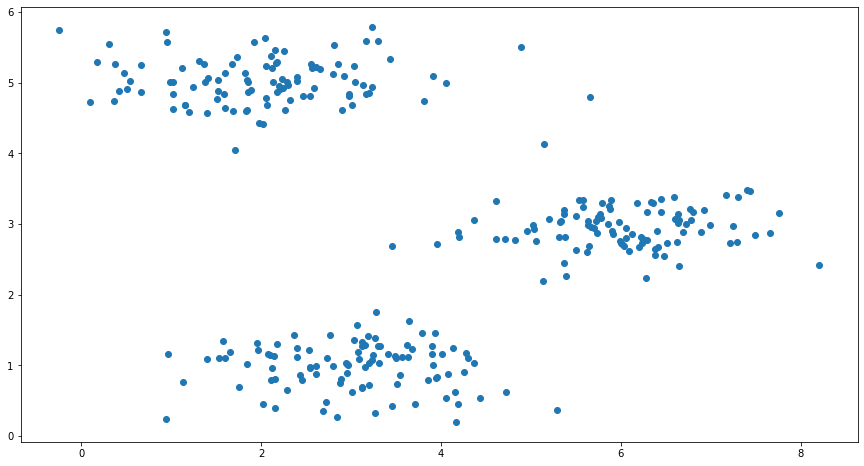

In [3]:
plt.figure(figsize=(15, 8))
plt.scatter(data[:, 0], data[:, 1])

## DBSCAN

- [sklearn.cluster.DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

Text(0.5, 1.0, 'DBSCAN')

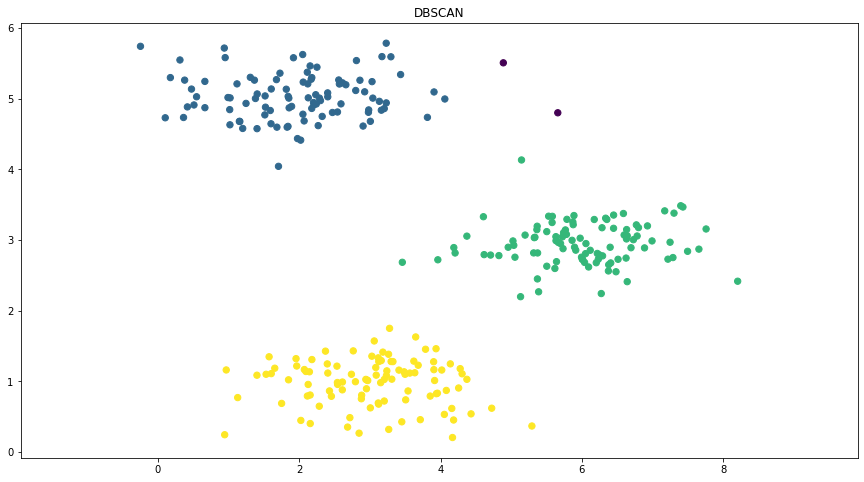

In [4]:
dbscan = DBSCAN(eps=0.9, min_samples=4).fit(data)
clusters_labels = dbscan.labels_

plt.figure(figsize=(15, 8))
plt.scatter(data[:,0], data[:,1], s=40, c=clusters_labels)
plt.axis('equal')
plt.title('DBSCAN')

## [Option] Implementing the `DBSCAN` algorithm

In [5]:
# 計算兩個向量之間的歐式距離
def cal_euclidean_distance(x1, x2):
    return np.sqrt(np.sum(np.square(x1 - x2), axis=0))

In [6]:
# 獲取一個點的ε-鄰域(存index)
def get_neighbor_points(cur_point, data, eps=0.5):
    all_points = []
    for i in range(len(data)):
        if cal_euclidean_distance(cur_point, data[i]) <= eps:
            all_points.append(i)
    return all_points

In [7]:
# def K_DBSCAN(data, eps=0.5, min_samples=5):
#     NOISE = 0
#     UNASSIGNED = 0
#     core=-1
#     edge=-2
    
#     # 找出所有核心點(core points),邊界點(border points)和雜訊(Noise)
#     point_neignbors = []
#     point_label = [UNASSIGNED] * len(data)
#     core_points = []
#     noncore_points = []
    
#     for i in range(len(data)):
#         points = get_neighbor_points(data[i], data, eps)
#         point_neignbors.append(points)
        
#         if len(points) >= min_samples:
#             core_points.append(i)
#             point_label[i] = core
#         else:
#             noncore_points.append(i)
    
#     for point in noncore_points:
#         for neighbor in point_neignbors[point]:
#             if neighbor in core_points:
#                 point_label[point] = edge
#                 break
    
#     # Start assigning point to cluster
#     ## Using a Queue to put all neighbor core point in queue and find neighbor's neighbor
#     clusters = 1
#     for i in range(len(point_label)):
#         cluster_queue = [] # queue
#         if point_label[i] == core:
#             point_label[i] = clusters
            
#             for x in point_neignbors[i]:
#                 if point_label[int(x)] == core:
#                     point_label[x] = clusters
#                     cluster_queue.append(x)
#                 elif point_label[x] == edge:
#                     point_label[x] = clusters
            
#             while cluster_queue:
#                 neighors = point_neignbors[cluster_queue.pop(0)]
#                 for y in neighors:
#                     if point_label[y] == core:
#                         point_label[y] = clusters
#                         cluster_queue.append(y)
#                     elif point_label[y] == edge:
#                         point_label[y] = clusters
                        
#             clusters+=1 # move to next cluster
    
#     return point_label, clusters

In [8]:
def K_DBSCAN(data, eps=0.5, min_samples=5):
    NOISE = 0
    UNASSIGNED = 0
    core=-1
    edge=-2
    
    # 找出所有核心點(core points),邊界點(border points)和雜訊(Noise)
    point_neignbors = []
    point_label = [UNASSIGNED] * len(data)
    core_points = []
    noncore_points = []
    
    for i in range(len(data)):
        points = get_neighbor_points(data[i], data, eps)
        point_neignbors.append(points)
        
        if len(points) >= min_samples:
            core_points.append(i)
            point_label[i] = core
        else:
            noncore_points.append(i)
    
    for point in noncore_points:
        for neighbor in point_neignbors[point]:
            if neighbor in core_points:
                point_label[point] = edge
                break
    
    # Start assigning point to cluster
    clusters = 1
    visited = set()
    
    while core_points:
        ## 隨機選取一個核心點
        index = np.random.randint(0, len(core_points))
        core_point = core_points[index]
    
        ## Using a Queue to put core point and find all neighbor point
        queue = [core_point]
        core_points.remove(core_point)
        visited.add(core_point)
        
        while queue:
            cur_point = queue.pop(0)
            point_label[cur_point] = clusters
            
            for x in point_neignbors[cur_point]:
                if x not in visited:
                    visited.add(x)
                    if point_label[x] == core:
                        point_label[x] = clusters
                        queue.append(x)
                        core_points.remove(x)
                    elif point_label[x] == edge :
                        point_label[x] = clusters
                        
        clusters+=1 # move to next cluster
    
    return point_label, clusters

4


Text(0.5, 1.0, 'DBSCAN')

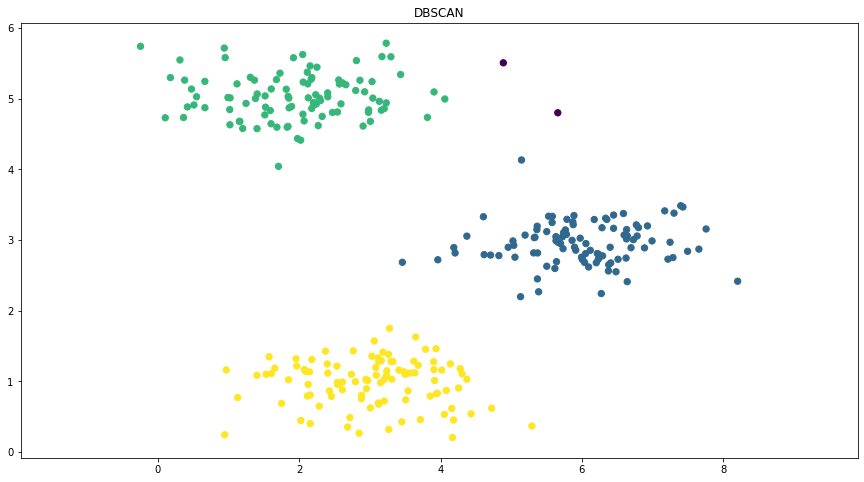

In [9]:
point_lable, clusters = K_DBSCAN(data, eps=0.9, min_samples=4)
print(clusters)

plt.figure(figsize=(15, 8))
plt.scatter(data[:,0], data[:,1], s=40, c=point_lable)
plt.axis('equal')
plt.title('DBSCAN')